In [668]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [669]:
df = pd.read_csv('Dataset1_Heart.csv')
df.head()

,Age,Sex,CP,RestBP,Chol,FBS,RestECG,Heartbeat,Exang,Oldpeak,Slope,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1


In [670]:
df.shape

(303, 12)

In [671]:
df.describe()

,Age,Sex,CP,RestBP,Chol,FBS,RestECG,Heartbeat,Exang,Oldpeak,Slope,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


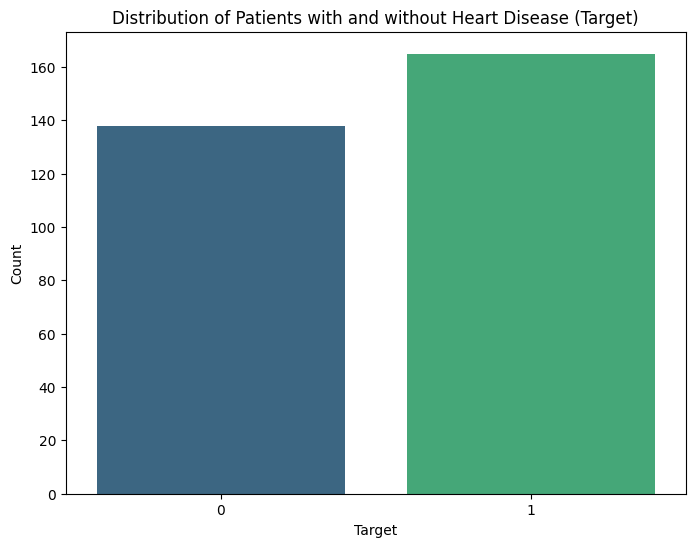

In [672]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(8, 6))
sns.barplot(x=df['Target'].value_counts().index, y=df['Target'].value_counts().values, palette="viridis")
plt.title("Distribution of Patients with and without Heart Disease (Target)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

In [673]:
df.isnull().sum()

Age          0
Sex          0
CP           0
RestBP       0
Chol         0
FBS          0
RestECG      0
Heartbeat    0
Exang        0
Oldpeak      0
Slope        0
Target       0
dtype: int64

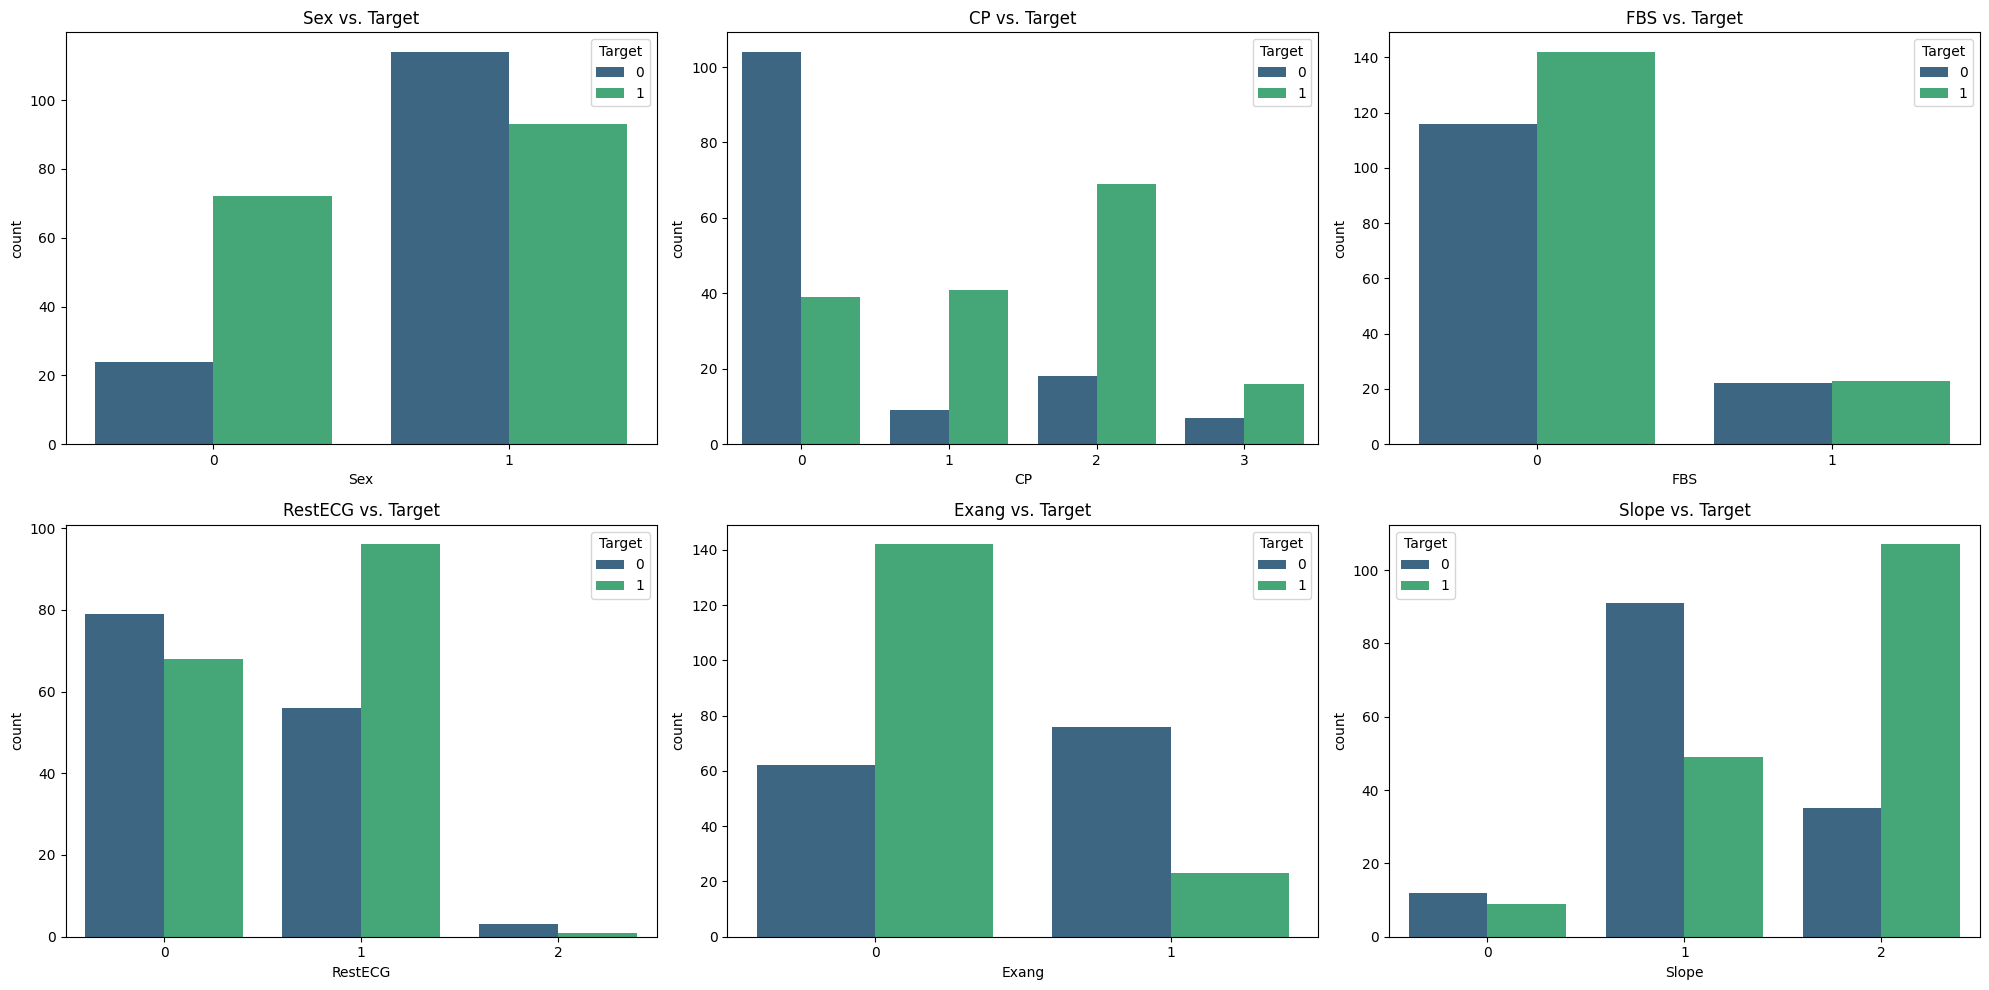

In [674]:
selected_features = ['Sex','CP','FBS', 'RestECG', 'Exang', 'Slope', 'Target']

# Create a DataFrame with the selected features
selected_df = df[selected_features]

# Plotting subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i, feature in enumerate(['Sex','CP','FBS', 'RestECG', 'Exang', 'Slope']):
    row, col = divmod(i, 3)
    sns.countplot(x=feature, hue='Target', data=selected_df, ax=axes[row, col], palette='viridis')
    axes[row, col].set_title(f'{feature} vs. Target')

plt.tight_layout()
plt.show()


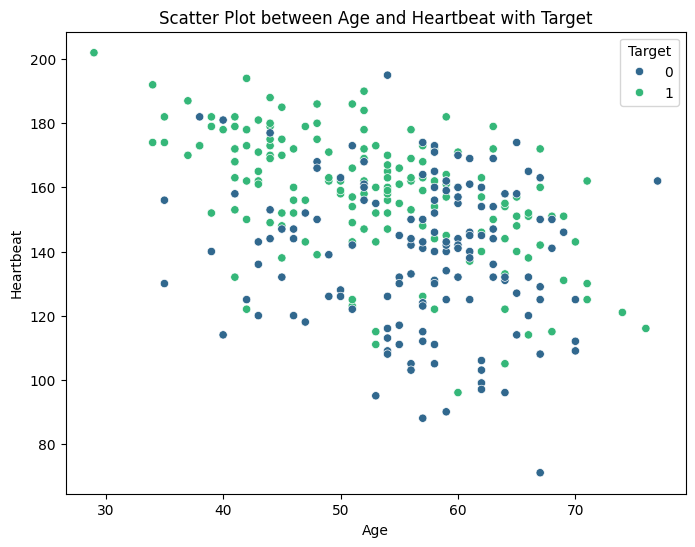

In [675]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Heartbeat', hue='Target', data=df, palette='viridis')

# Set labels and title
plt.title('Scatter Plot between Age and Heartbeat with Target')
plt.xlabel('Age')
plt.ylabel('Heartbeat')

plt.show()

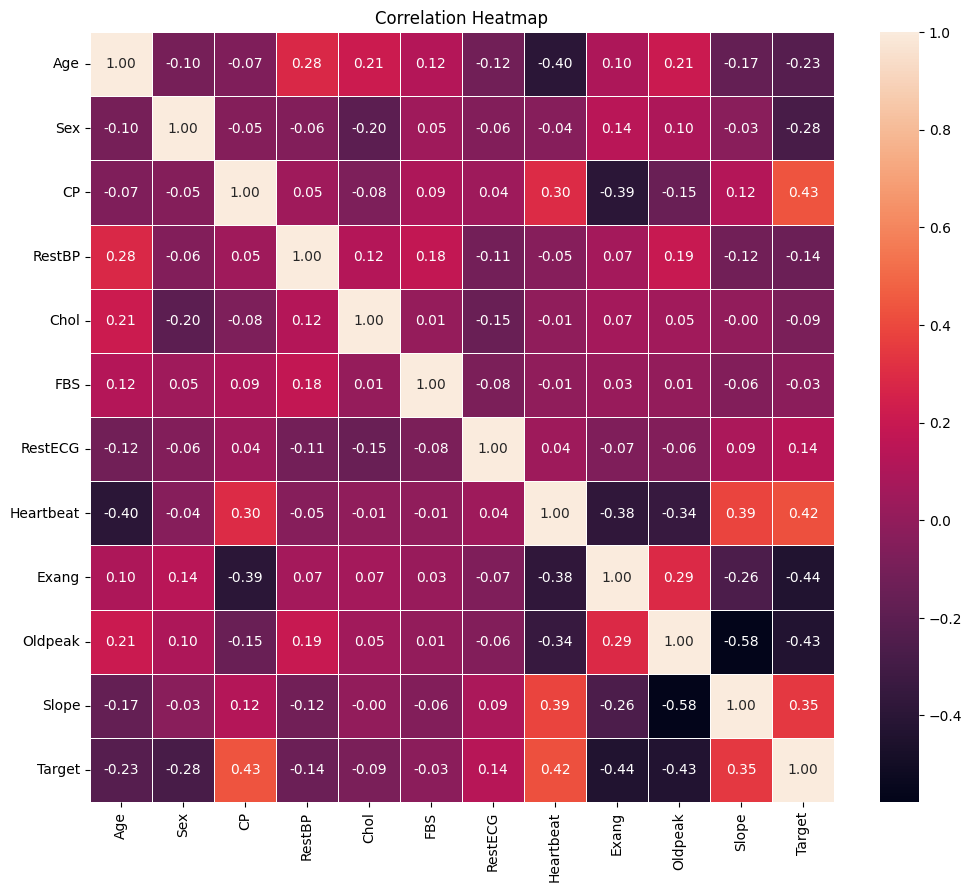

In [676]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [677]:
df.head()

,Age,Sex,CP,RestBP,Chol,FBS,RestECG,Heartbeat,Exang,Oldpeak,Slope,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1


In [678]:
from sklearn.preprocessing import LabelEncoder

# BINARY COLUMNS ['Sex', 'FBS', 'Exang']
binary_columns = df.nunique() == 2

#CATEGORICAL COLUMNS ['CP', 'RestECG', 'Slope']

# ENCODING BINARY COLUMNS
le = LabelEncoder()
for c in df.columns[binary_columns]:
    df[c] = le.fit_transform(df[c])

# ENCODING CATEGORICAL COLUMNS
df = pd.get_dummies(df, columns=['CP', 'RestECG', 'Slope'])


In [679]:
df.head()

,Age,Sex,RestBP,Chol,FBS,Heartbeat,Exang,Oldpeak,Target,CP_0,CP_1,CP_2,CP_3,RestECG_0,RestECG_1,RestECG_2,Slope_0,Slope_1,Slope_2
0,63,1,145,233,1,150,0,2.3,1,False,False,False,True,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,1,False,False,True,False,False,True,False,True,False,False
2,41,0,130,204,0,172,0,1.4,1,False,True,False,False,True,False,False,False,False,True
3,56,1,120,236,0,178,0,0.8,1,False,True,False,False,False,True,False,False,False,True
4,57,0,120,354,0,163,1,0.6,1,True,False,False,False,False,True,False,False,False,True


In [680]:
X = df.drop('Target', axis=1)
y = df['Target']

In [681]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [682]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [683]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [684]:
model.fit(X_train,y_train)

LogisticRegression()

In [685]:
y_pred = model.predict(X_test)

In [686]:
pred = y_pred.flatten()
act = y_test.values.flatten()

result = pd.DataFrame({'actual':act, 'predicted':pred})


result.head(50)

,actual,predicted
0,0,0
1,1,1
2,0,1
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


<Axes: ylabel='Target'>

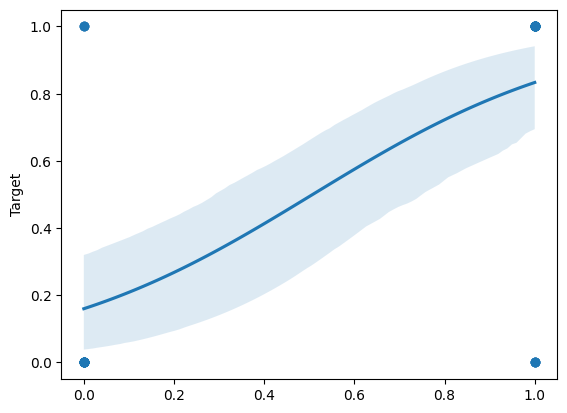

In [687]:
import seaborn as sns
import statsmodels.api as sm

sns.regplot(x=model.predict(X_test), y=y_test, logistic=True)



ACCURACY: 84%


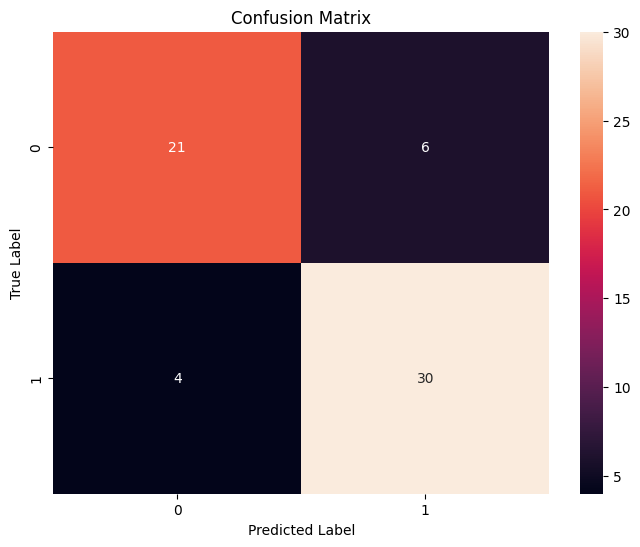

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [688]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)

print(f'ACCURACY: {round(accuracy * 100)}%')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(class_rep)